In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob

C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('complaints.csv', encoding='ISO-8859-1')
data.head()

Row  Document Number Receive Date Form Status Form Status Date  \
0    1        200449466   03/02/2021     ON HOLD       03/02/2021   
1    2        200449464   03/01/2021     ON HOLD       03/01/2021   
2    3        200449463   03/01/2021     ON HOLD       03/01/2021   
3    4        200449463   03/01/2021     ON HOLD       03/01/2021   
4    5        200449462   03/01/2021     ON HOLD       03/01/2021   

      Complainant Connection         Facility Type  \
0  Nearby resident            LOCATION               
1  Nearby resident            LOCATION               
2  Nearby resident            LOCATION               
3  Nearby resident            LOCATION               
4  Nearby resident            LOCATION               

                             Well Name      Well Number API State Code  ...  \
0                                                                   05  ...   
1                                                                   05  ...   
2                                                                   05  ...   
3                                                                   05  ...   
4                                                                   05  ...   

                                   Issue Description Issue Resolution  \
0  Location: Ivey Pad\nIssue: On February 13, 202...              NaN   
1  Excessive noise coming from the Mae J site (46...              NaN   
2  Location: MAE J\nIssue: The noise started arou...              NaN   
3  It smells like rubbing alcohol or acetone. It ...              NaN   
4  Location: The fracking site is near our house....              NaN   

  Issue Resolved Date  Letter Sent NOAV NOAV Number Form 19 Form 19 Number  \
0                 NaN          NaN  NaN         NaN     NaN            NaN   
1                 NaN          NaN  NaN         NaN     NaN            NaN   
2                 NaN          NaN  NaN         NaN     NaN            NaN   
3                 NaN          NaN  NaN         NaN     NaN            NaN   
4                 NaN          NaN  NaN         NaN     NaN            NaN   

  Form 27 Form 27 Number  
0     NaN            NaN  
1     NaN            NaN  
2     NaN            NaN  
3     NaN            NaN  
4     NaN            NaN  

[5 rows x 36 columns]

In [3]:
data.columns

Index(['Row', 'Document Number', 'Receive Date', 'Form Status',
       'Form Status Date', 'Complainant Connection', 'Facility Type',
       'Well Name', 'Well Number', 'API State Code', 'API County Code',
       'API Sequence Number', 'Facility Name', 'Facility ID', 'County Name',
       'Qtr Qtr', 'Section', 'Township', 'Range', 'Meridian',
       'Operator Number', 'Operator', 'Initial Contact Date',
       'Method Received', 'Routed Agency', 'Issue Category',
       'Issue Description', 'Issue Resolution', 'Issue Resolved Date',
       'Letter Sent', 'NOAV', 'NOAV Number', 'Form 19', 'Form 19 Number',
       'Form 27', 'Form 27 Number'],
      dtype='object')

In [4]:
TextBlob(data['Issue Description'][1])

TextBlob("Excessive noise coming from the Mae J site (466612), immediately north of the Colliers Hill neighborhood. Noise was (and is) consistently measured at >70dB from the Mae J site as measured from approximately 1000ft directly south in the Colliers Hill residential zone at 9pm on 03/01/2021 (an otherwise calm evening). This excessive noise is consistently heard from operations in recent days. 

For the sake of the good people of the people with homes in the northern Colliers Hill neighborhood, please help.
Thank you for any and all consideration to the request.")

In [5]:
polarity = []
subjectivity = []
for i in range(data.shape[0]):
    try:
        text = TextBlob(data['Issue Description'][i])
        subjectivity.append(text.sentiment.subjectivity)
        polarity.append(text.sentiment.polarity)
    except:
        subjectivity.append(np.nan)
        polarity.append(np.nan)

In [6]:
print(len(subjectivity), len(polarity), data.shape[0])

5422 5422 5422


C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  29.,   26.,   85.,  378., 1397., 2932.,  421.,  134.,   11.,
           8.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

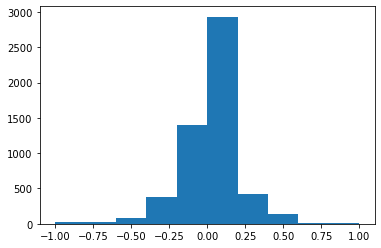

In [7]:
plt.hist(polarity)

(array([ 834.,  263.,  577.,  846., 1074.,  940.,  392.,  190.,  122.,
         183.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

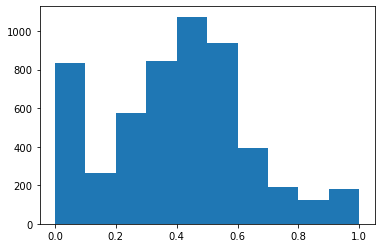

In [8]:
plt.hist(subjectivity)

In [9]:
data['subjectivity'] = subjectivity
data['polarity'] = polarity

In [10]:
data.head()

Row  Document Number Receive Date Form Status Form Status Date  \
0    1        200449466   03/02/2021     ON HOLD       03/02/2021   
1    2        200449464   03/01/2021     ON HOLD       03/01/2021   
2    3        200449463   03/01/2021     ON HOLD       03/01/2021   
3    4        200449463   03/01/2021     ON HOLD       03/01/2021   
4    5        200449462   03/01/2021     ON HOLD       03/01/2021   

      Complainant Connection         Facility Type  \
0  Nearby resident            LOCATION               
1  Nearby resident            LOCATION               
2  Nearby resident            LOCATION               
3  Nearby resident            LOCATION               
4  Nearby resident            LOCATION               

                             Well Name      Well Number API State Code  ...  \
0                                                                   05  ...   
1                                                                   05  ...   
2                                                                   05  ...   
3                                                                   05  ...   
4                                                                   05  ...   

  Issue Resolved Date Letter Sent NOAV  NOAV Number Form 19 Form 19 Number  \
0                 NaN         NaN  NaN          NaN     NaN            NaN   
1                 NaN         NaN  NaN          NaN     NaN            NaN   
2                 NaN         NaN  NaN          NaN     NaN            NaN   
3                 NaN         NaN  NaN          NaN     NaN            NaN   
4                 NaN         NaN  NaN          NaN     NaN            NaN   

  Form 27 Form 27 Number subjectivity  polarity  
0     NaN            NaN     0.666667 -0.233333  
1     NaN            NaN     0.566667  0.077778  
2     NaN            NaN     0.000000  0.000000  
3     NaN            NaN     0.000000  0.000000  
4     NaN            NaN     0.746667 -0.147000  

[5 rows x 38 columns]

In [11]:
data.sort_values(by='polarity')[['Operator', 'polarity','subjectivity']]

Operator  polarity  \
3259  CRESTONE PEAK RESOURCES OPERATING LLC         ...     -1.00   
2462  CRESTONE PEAK RESOURCES OPERATING LLC         ...     -1.00   
2420  CRESTONE PEAK RESOURCES OPERATING LLC         ...     -1.00   
2391  CRESTONE PEAK RESOURCES OPERATING LLC         ...     -1.00   
583   CRESTONE PEAK RESOURCES OPERATING LLC         ...     -1.00   
...                                                 ...       ...   
1054  ROCKY MOUNTAIN MIDSTREAM LLC                  ...      0.91   
189   BURLINGTON RESOURCES OIL & GAS LP             ...      0.91   
3301  CRESTONE PEAK RESOURCES OPERATING LLC         ...      0.91   
1997  CRESTONE PEAK RESOURCES OPERATING LLC         ...      1.00   
4023  HIGH PLAINS ENERGY LLC                        ...       NaN   

      subjectivity  
3259           1.0  
2462           1.0  
2420           1.0  
2391           1.0  
583            1.0  
...            ...  
1054           1.0  
189            1.0  
3301           1.0  
1997           1.0  
4023           NaN  

[5422 rows x 3 columns]

In [12]:
data.columns

Index(['Row', 'Document Number', 'Receive Date', 'Form Status',
       'Form Status Date', 'Complainant Connection', 'Facility Type',
       'Well Name', 'Well Number', 'API State Code', 'API County Code',
       'API Sequence Number', 'Facility Name', 'Facility ID', 'County Name',
       'Qtr Qtr', 'Section', 'Township', 'Range', 'Meridian',
       'Operator Number', 'Operator', 'Initial Contact Date',
       'Method Received', 'Routed Agency', 'Issue Category',
       'Issue Description', 'Issue Resolution', 'Issue Resolved Date',
       'Letter Sent', 'NOAV', 'NOAV Number', 'Form 19', 'Form 19 Number',
       'Form 27', 'Form 27 Number', 'subjectivity', 'polarity'],
      dtype='object')

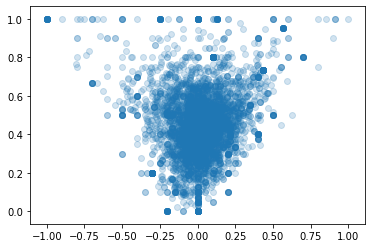

In [13]:
plt.scatter(data.polarity, data.subjectivity, alpha=0.2)

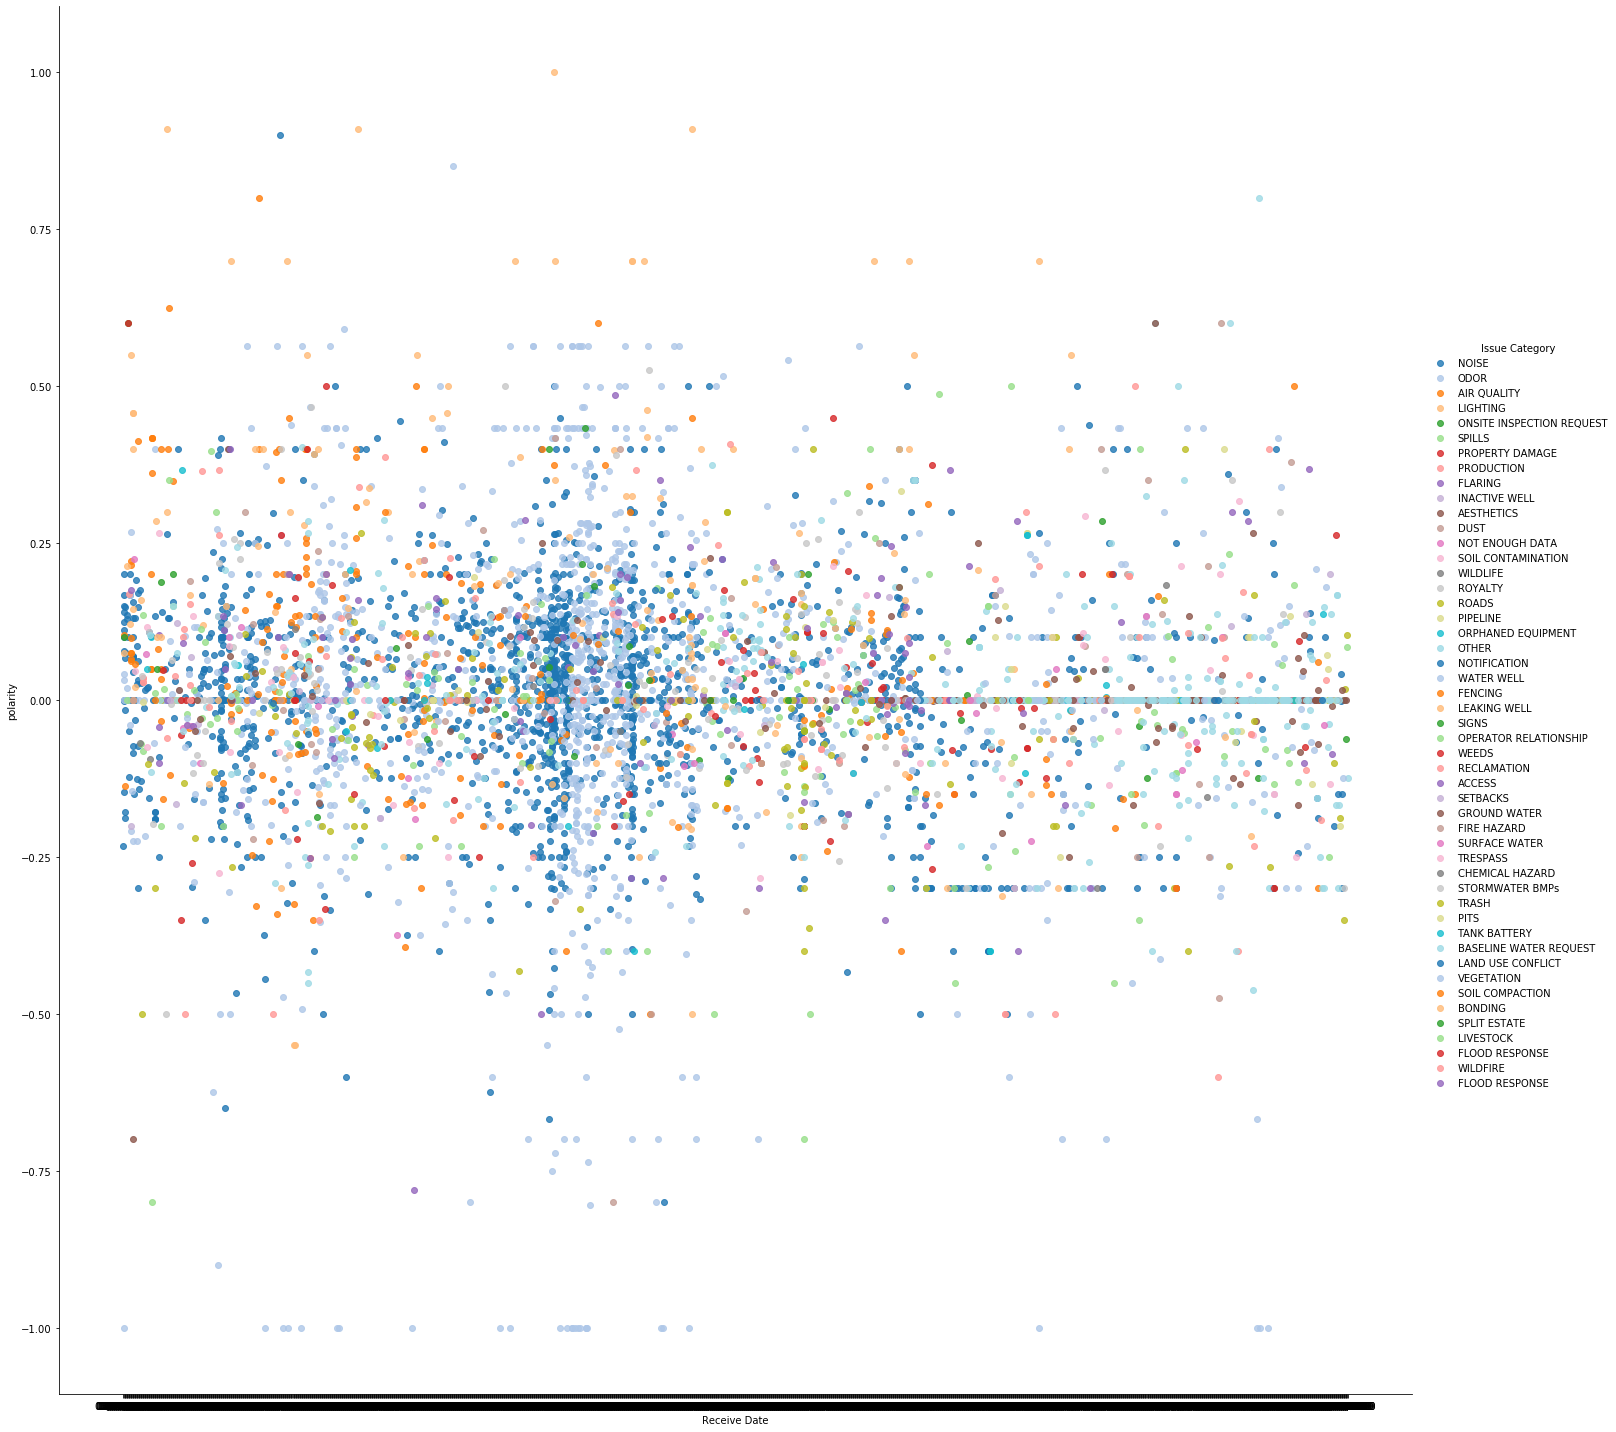

In [14]:
sca = sns.lmplot('Receive Date', 'polarity', data=data, hue='Issue Category', fit_reg=False, palette='tab20', height=20)


In [16]:
len(data['Facility ID'].unique())

1169

# Ideas

* How does `issue category` relate to emotion?
* How does `facility category` relate to emotion?
* Number of complaints and oil price?
* Most emotional `Operator`? (t-tests f-tests)
* Most emotional `Counties`? (disentangle county and company)
* Emotion and repeat offenders? (`Facility ID`)
* Emotion and time between `Receive Date` and `Resolved Date`?
